In [1]:
import numpy as np
import pandas as pd

In [3]:
# Load the CSV file
train_data = pd.read_csv('C:\\Users\\Shreyas1\\all_data\\Pandas_code\\train_info.csv')

# Count the occurrences of each Source_Station_Name and Destination_Station_Name
popular_sources = train_data['Source_Station_Name'].value_counts()
popular_destinations = train_data['Destination_Station_Name'].value_counts()

# Display top 5 popular source and destination stations
top_sources = popular_sources.head(5)
top_destinations = popular_destinations.head(5)

print("Top 5 Source Stations:\n", top_sources)
print("\nTop 5 Destination Stations:\n", top_destinations)


Top 5 Source Stations:
 Source_Station_Name
CST-MUMBAI       513
SEALDAH          372
CHENNAI BEACH    339
HOWRAH JN.       338
KALYAN JN        285
Name: count, dtype: int64

Top 5 Destination Stations:
 Destination_Station_Name
CST-MUMBAI       514
SEALDAH          373
CHENNAI BEACH    342
HOWRAH JN.       337
KALYAN JN        284
Name: count, dtype: int64


In [13]:
# Filter trains that start from 'CST-MUMBAI' and run on 'Saturday'
filtered_trains = train_data[(train_data['Source_Station_Name'] == 'CST-MUMBAI') & 
                             (train_data['days'] == 'Saturday')]

# Display the filtered result (showing top 5 for readability)
print("Filtered Trains:\n", filtered_trains.head())


Filtered Trains:
       Train_No    Train_Name Source_Station_Name Destination_Station_Name  \
526      12109  PANCHAVATI E          CST-MUMBAI               MANMAD JN.   
532      12115  CSTM-SUR SID          CST-MUMBAI                  SOLAPUR   
550      12133  CSMT-MAJN EX          CST-MUMBAI             MANGALORE JN   
1074     12701  CSMT-HYB HUS          CST-MUMBAI         HYDERABAD DECCAN   
2044     16351  CSMT- NCJ EX          CST-MUMBAI            NAGERCOIL JN.   

          days  
526   Saturday  
532   Saturday  
550   Saturday  
1074  Saturday  
2044  Saturday  


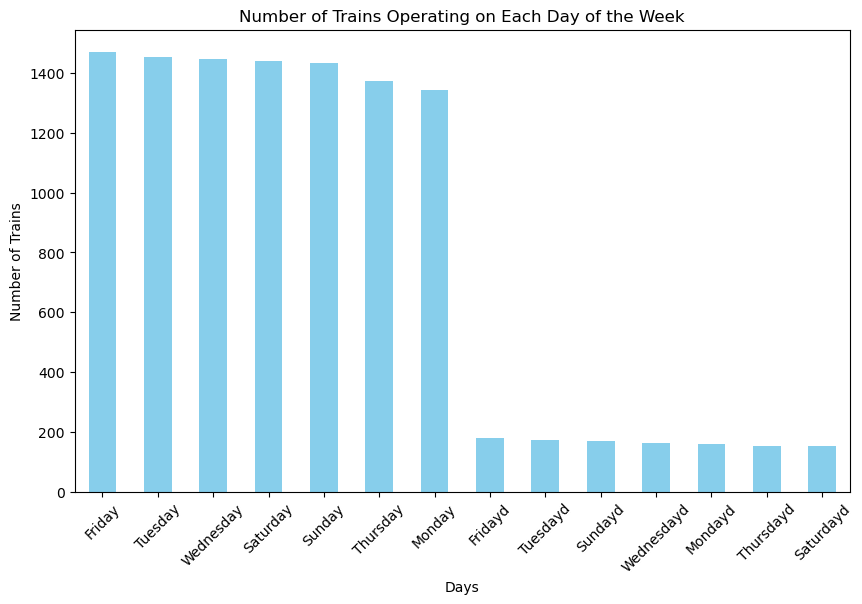

In [5]:
import matplotlib.pyplot as plt

# Count the number of trains operating on each day
day_counts = train_data['days'].value_counts()

# Plotting the number of trains operating each day
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trains Operating on Each Day of the Week')
plt.xlabel('Days')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Count occurrences of each route (Source-Destination pair)
routes = train_data.groupby(['Source_Station_Name', 'Destination_Station_Name']).size()
top_routes = routes.sort_values(ascending=False).head(10)
print("Top 10 Most Common Routes:\n", top_routes)


Top 10 Most Common Routes:
 Source_Station_Name  Destination_Station_Name
TAMBARAM             CHENNAI BEACH               137
CHENNAI BEACH        TAMBARAM                    137
CST-MUMBAI           PANVEL                       94
PANVEL               CST-MUMBAI                   93
CST-MUMBAI           RAVLI JN                     90
RAVLI JN             CST-MUMBAI                   90
VELACHEERY           CHENNAI BEACH                89
CHENNAI BEACH        VELACHEERY                   87
CST-MUMBAI           THANE                        77
THANE                CST-MUMBAI                   72
dtype: int64


In [19]:
# Calculate average frequency of trains per source station
avg_frequency = train_data['Source_Station_Name'].value_counts().mean()
print("Average Train Frequency per Station:", avg_frequency)


Average Train Frequency per Station: 12.066232356134636


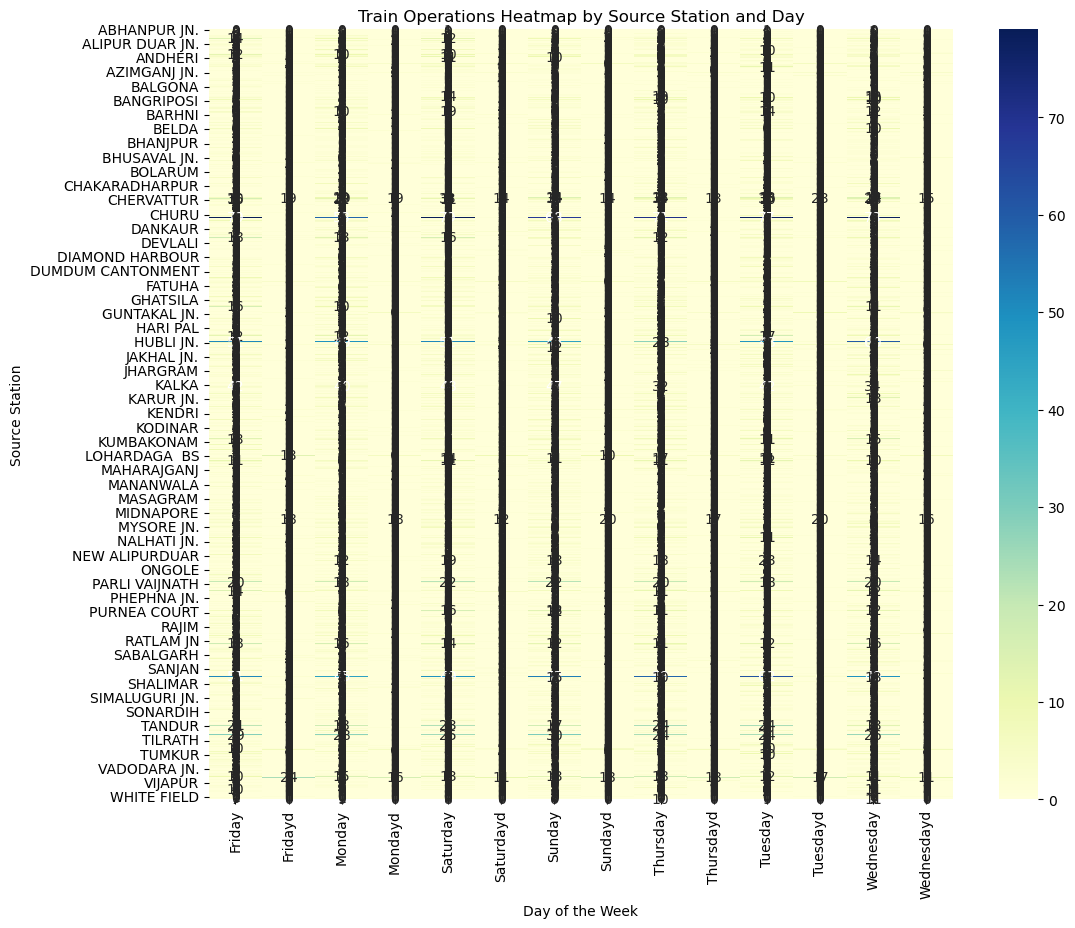

In [7]:
import seaborn as sns

# Create a pivot table to count trains per day for each source station
pivot_table = train_data.pivot_table(index='Source_Station_Name', columns='days', aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Train Operations Heatmap by Source Station and Day")
plt.xlabel("Day of the Week")
plt.ylabel("Source Station")
plt.show()


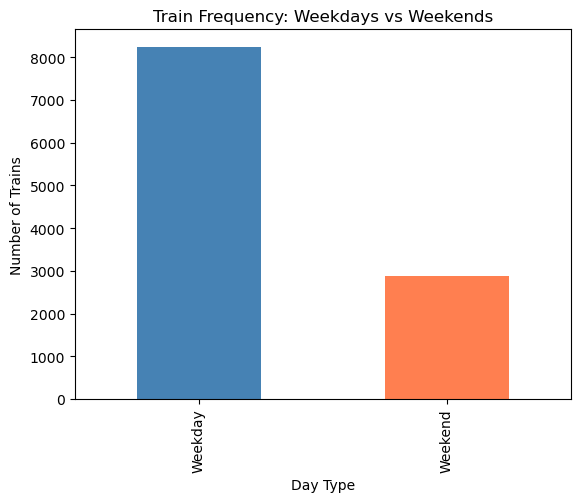

In [23]:
# Define weekdays and weekends
weekends = ['Saturday', 'Sunday']
train_data['day_type'] = train_data['days'].apply(lambda x: 'Weekend' if x in weekends else 'Weekday')

# Count trains based on day type
day_type_counts = train_data['day_type'].value_counts()
day_type_counts.plot(kind='bar', color=['steelblue', 'coral'])
plt.title("Train Frequency: Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("Number of Trains")
plt.show()


In [8]:
# Display unique routes as a list (or filter if distances are available in another dataset)
unique_routes = train_data[['Source_Station_Name', 'Destination_Station_Name']].drop_duplicates()
print("Unique Routes:\n", unique_routes.head())


Unique Routes:
   Source_Station_Name            Destination_Station_Name
0     SAWANTWADI ROAD                         MADGOAN JN.
1         MADGOAN JN.                     SAWANTWADI ROAD
2         MADGOAN JN.  CHHATRAPATI SHAHU MAHARAJ TERMINUS
3   DELHI-SAFDAR JANG                   DELHI-SAFDAR JANG
4          AURANGABAD                        VARANASI JN.


In [9]:
# Count trains per route (Source and Destination combination)
route_frequency = train_data.groupby(['Source_Station_Name', 'Destination_Station_Name']).size()
print("Train Frequency by Route:\n", route_frequency.sort_values(ascending=False).head(10))


Train Frequency by Route:
 Source_Station_Name  Destination_Station_Name
TAMBARAM             CHENNAI BEACH               137
CHENNAI BEACH        TAMBARAM                    137
CST-MUMBAI           PANVEL                       94
PANVEL               CST-MUMBAI                   93
CST-MUMBAI           RAVLI JN                     90
RAVLI JN             CST-MUMBAI                   90
VELACHEERY           CHENNAI BEACH                89
CHENNAI BEACH        VELACHEERY                   87
CST-MUMBAI           THANE                        77
THANE                CST-MUMBAI                   72
dtype: int64


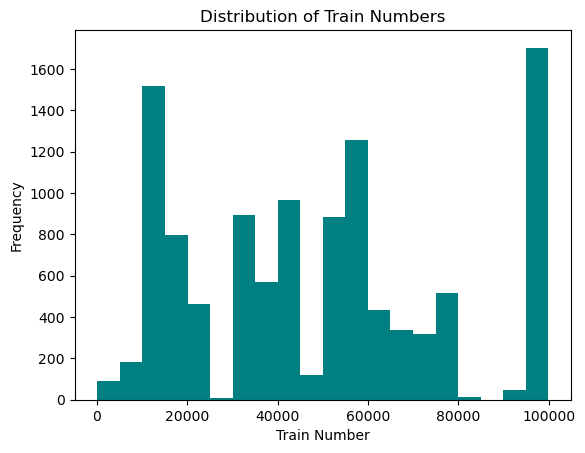

In [29]:
train_data['Train_No'].plot(kind='hist', bins=20, color='teal')
plt.title("Distribution of Train Numbers")
plt.xlabel("Train Number")
plt.ylabel("Frequency")
plt.show()


In [13]:
from collections import Counter
# Split and count train name words
train_name_words = ' '.join(train_data['Train_Name']).split()
common_words = Counter(train_name_words).most_common(10)
print("Common Words in Train Names:", common_words)


Common Words in Train Names: [('-', 1217), ('PASS', 1047), ('EMU', 901), ('EXP', 538), ('PAS', 425), ('LOCA', 421), ('SDAH', 385), ('LOC', 329), ('LO', 316), ('PA', 249)]


In [15]:
df.isna()

NameError: name 'df' is not defined

In [17]:
train_data.isna()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
11108,False,False,False,False,False
11109,False,False,False,False,False
11110,False,False,False,False,False
11111,False,False,False,False,False


In [19]:
train_data.dropna()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday
...,...,...,...,...,...
11108,99904,PUNE-TGN EMU,PUNE JN.,TALEGAON,Tuesday
11109,99905,EMU,TALEGAON,SHIVAJINAGAR,Monday
11110,99906,EMU,PUNE JN.,TALEGAON,Wednesday
11111,99907,EMU,TALEGAON,PUNE JN.,Thursday


<Axes: ylabel='count'>

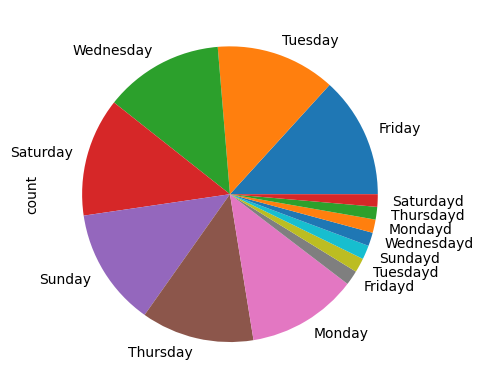

In [21]:
train_data['days'].value_counts().plot(kind='pie')